In [1]:
%load_ext autoreload
%autoreload 2

from pathlib import Path
import urllib3
import warnings

from IPython.display import Markdown, display

import matplotlib
import plotly.io as pio

from load.storage import load_plot_dict
from plotting.tables import *

urllib3.disable_warnings(urllib3.exceptions.InsecureRequestWarning)
warnings.simplefilter("ignore", FutureWarning)
warnings.simplefilter("ignore", matplotlib.MatplotlibDeprecationWarning)

#pio.renderers.default = "notebook"
#pio.templates.default = "plotly_dark"
from IPython.display import display, HTML
import plotly.graph_objects as go

display(HTML("<style>:root { --jp-notebook-max-width: 100% !important; }</style>"))
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
BASE_PATH=Path("_out/2025-12-17T13-00-00+0000")

plots = load_plot_dict(BASE_PATH / "plots")
latency_df = pd.read_parquet(BASE_PATH / "tables" / "latency_df.parquet")
other_df = pd.read_parquet(BASE_PATH / "tables" / "other_df.parquet")


In [3]:
metric_scale = {
    "ITL": 1e3,
    "KV Cache Util.": 1e2,
    "Energy": 1e-3,
    "Power": 1e-3,

}

metric_unit = {
    "ITL": "ms",
    "KV Cache Util.": "%",
    "Queued Requests": "",
    "Power": "kW",
    "Energy": "kWh"
}


latency_df = sort(latency_df, ['1 Replica', 'WVA', '12 Replicas'])
other_df = sort(other_df, ['1 Replica', 'WVA', '12 Replicas'])

display(
    add_metric_separators(
        format_with_units_per_run_metric(
            with_relative_change(
                latency_df, baseline_key="WVA"
            ), 
            metric_scale=metric_scale, 
            metric_unit=metric_unit, 
            baseline_key="WVA"
        )
    ).hide(axis='index')
)


In [4]:
display(
    add_metric_separators(
        format_with_units_per_run_metric(
            with_relative_change(other_df, baseline_key="WVA"), 
            metric_scale=metric_scale, 
            metric_unit=metric_unit, 
            baseline_key="WVA"
        )
    ).hide(axis='index')
)

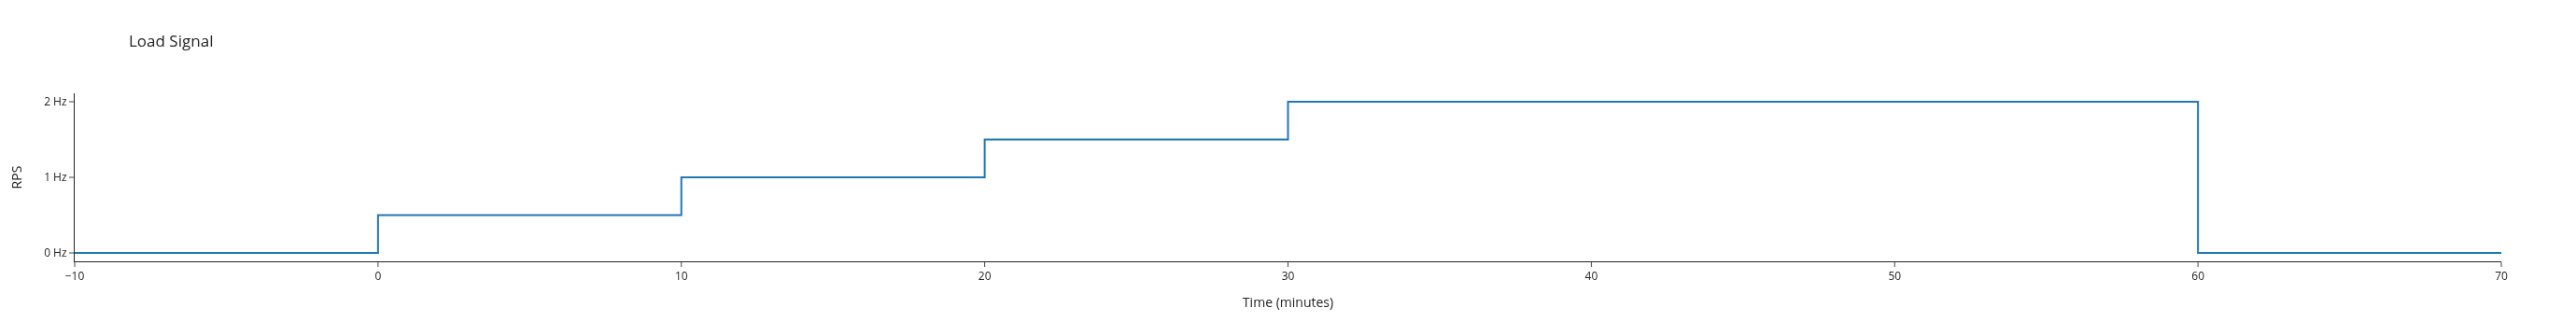

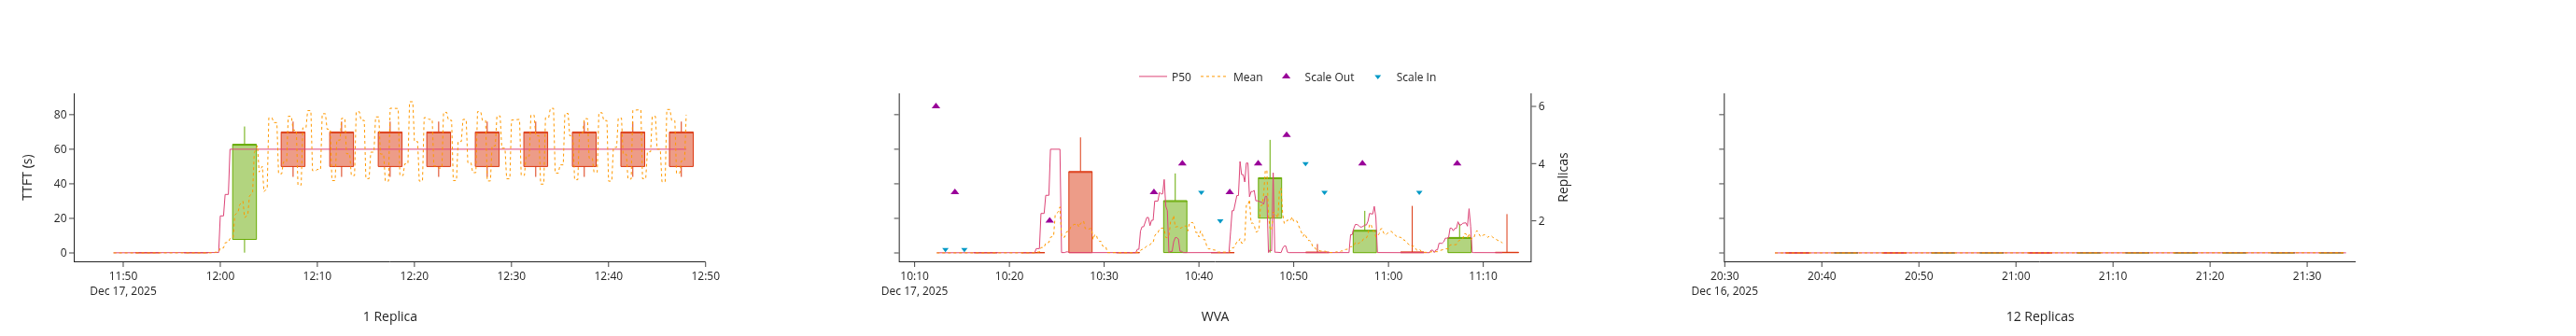

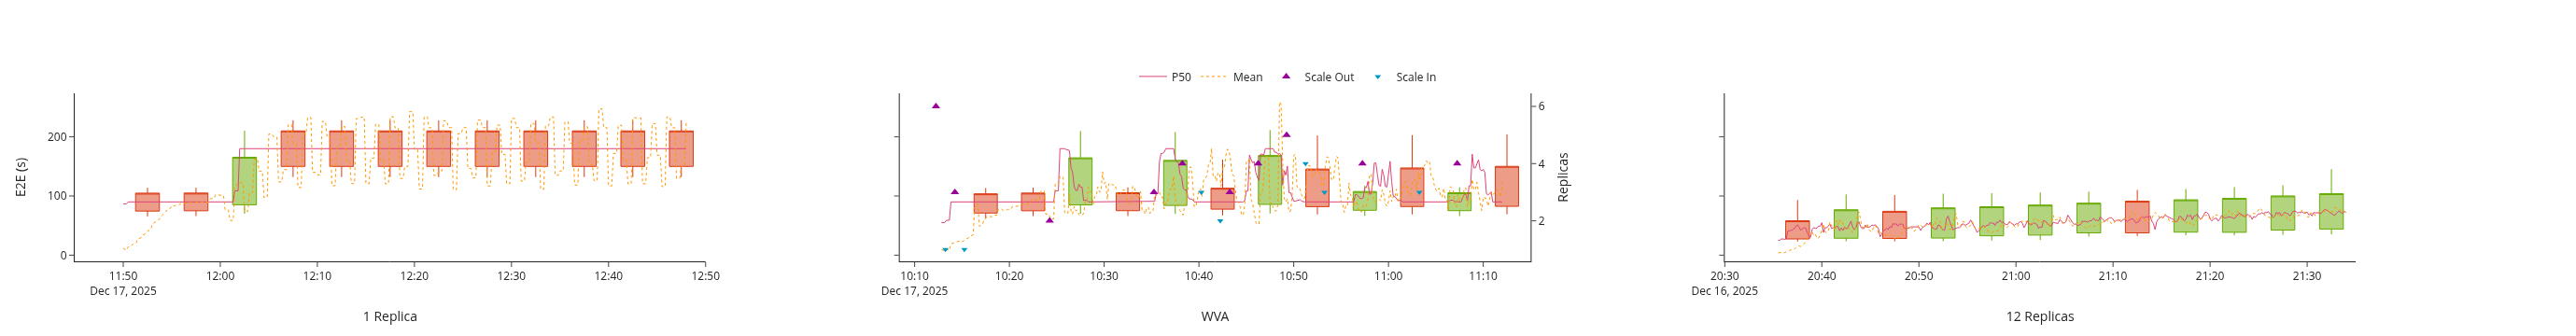

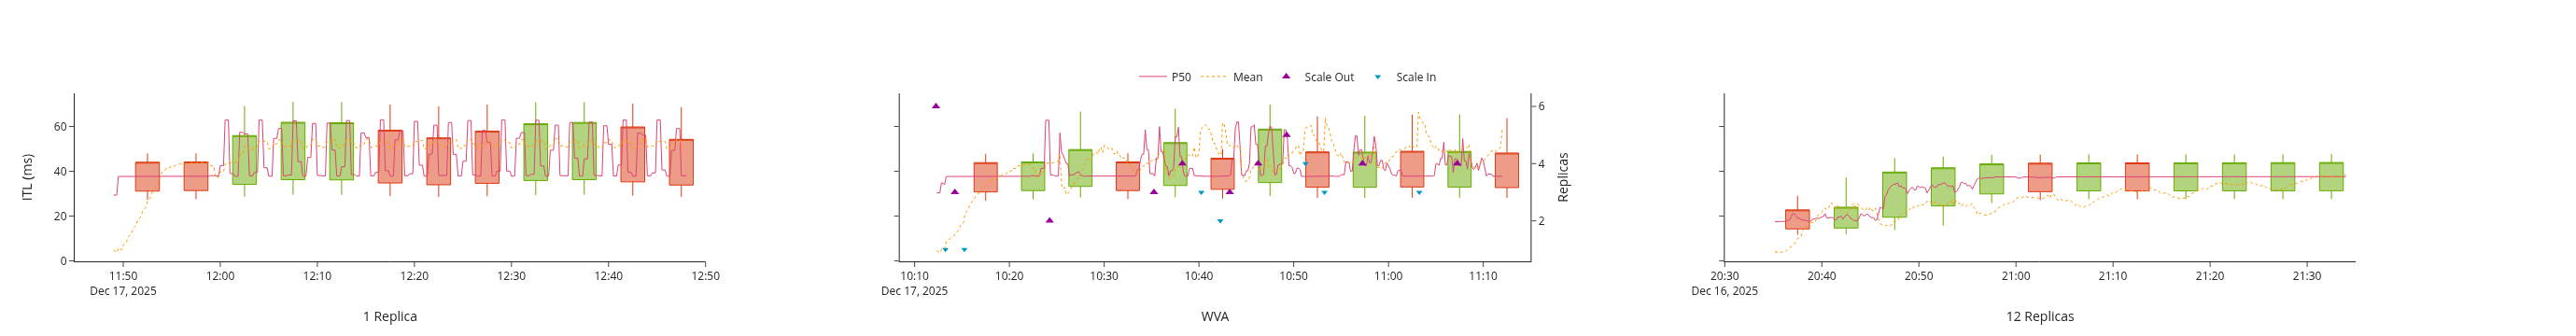

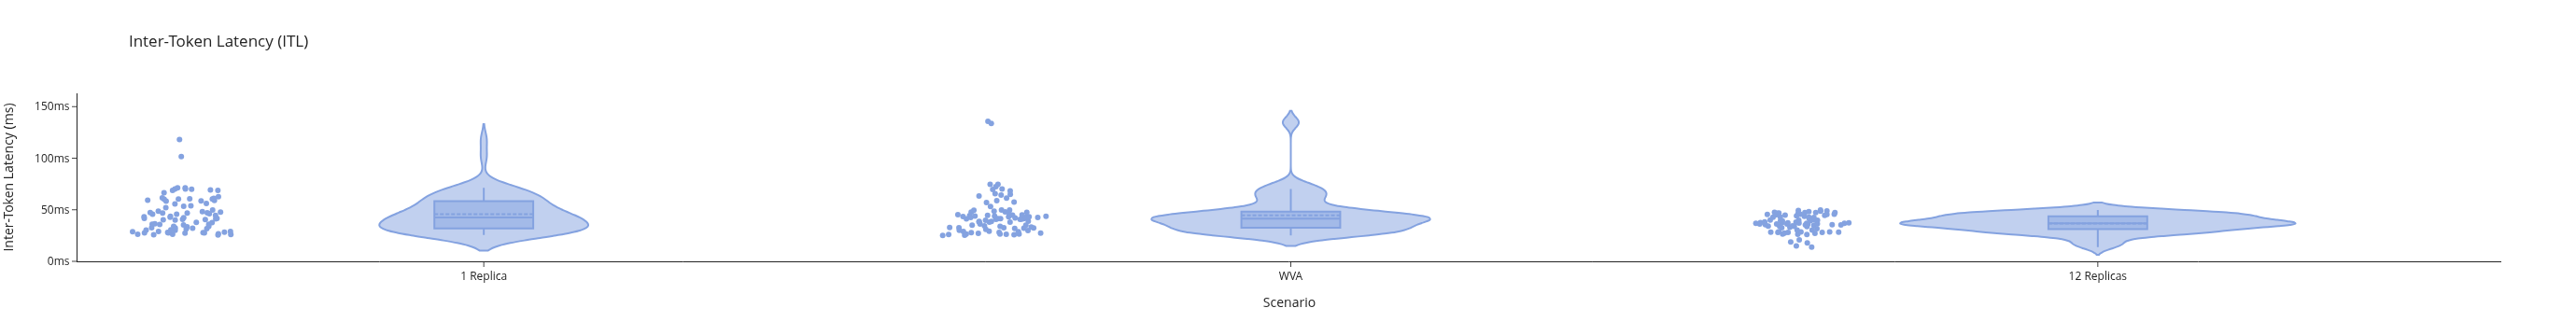

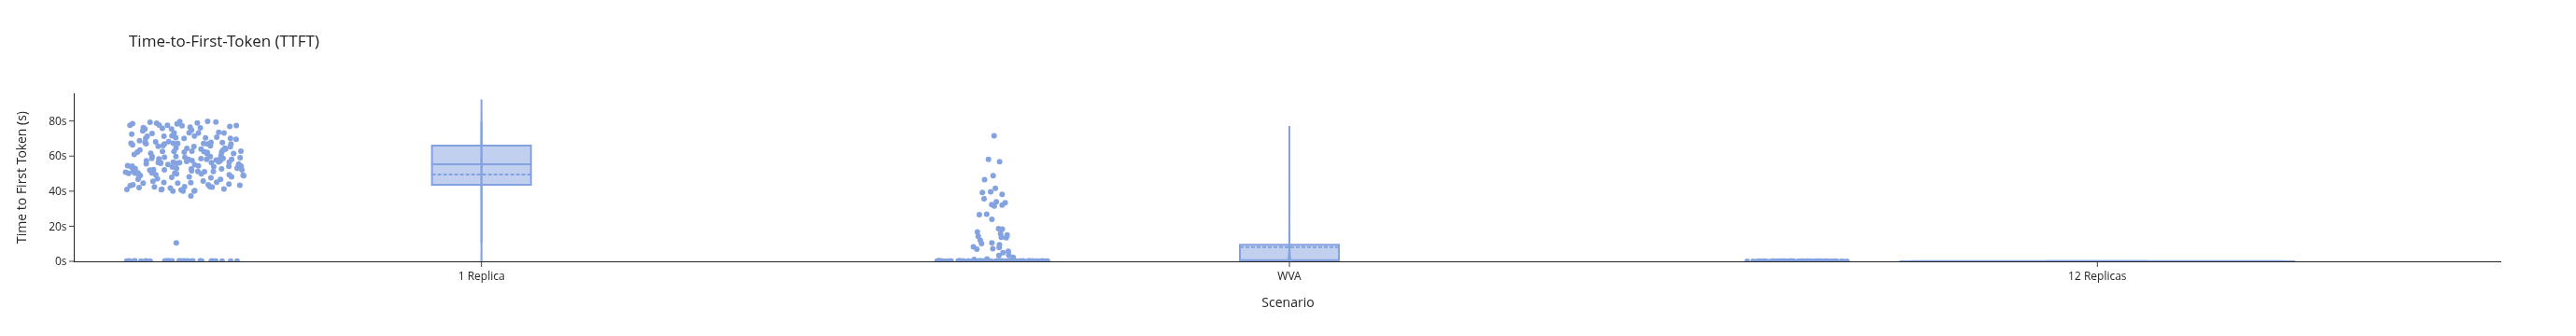

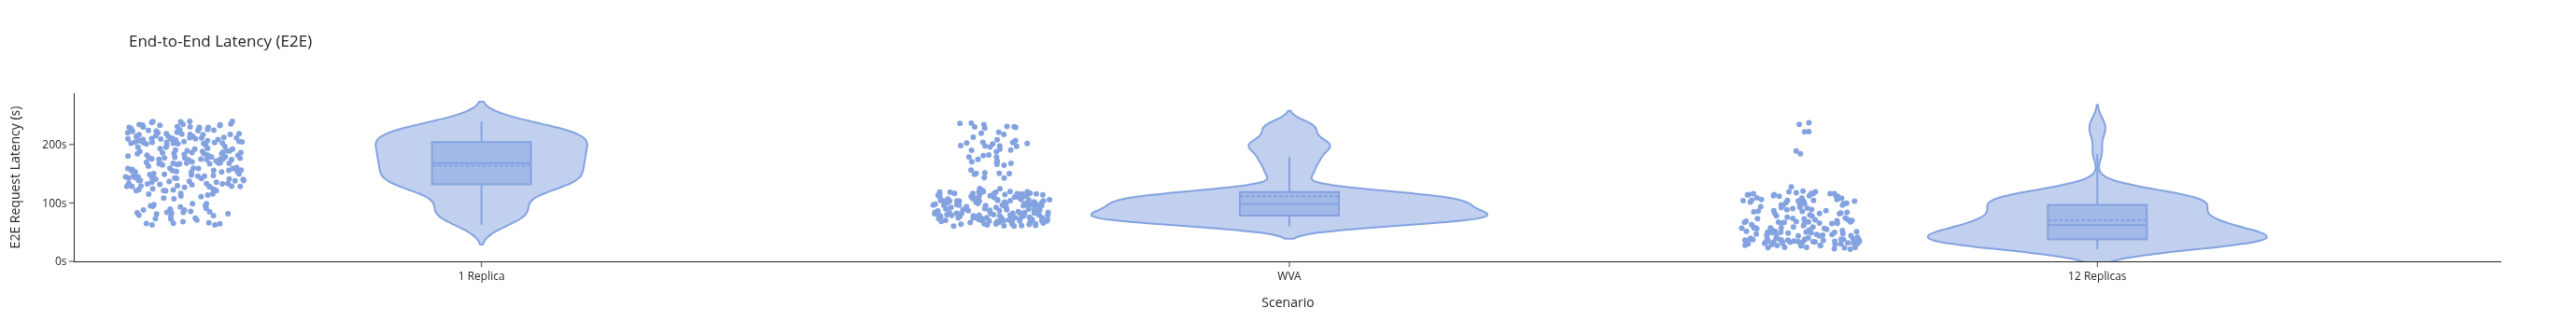

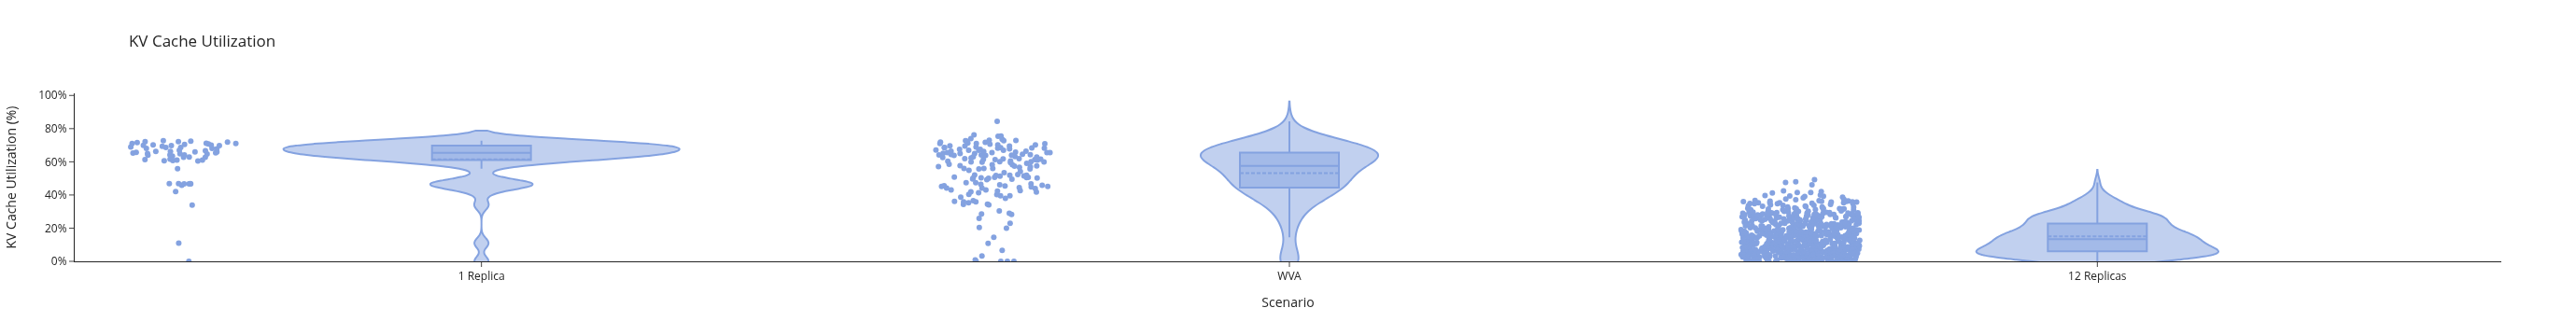

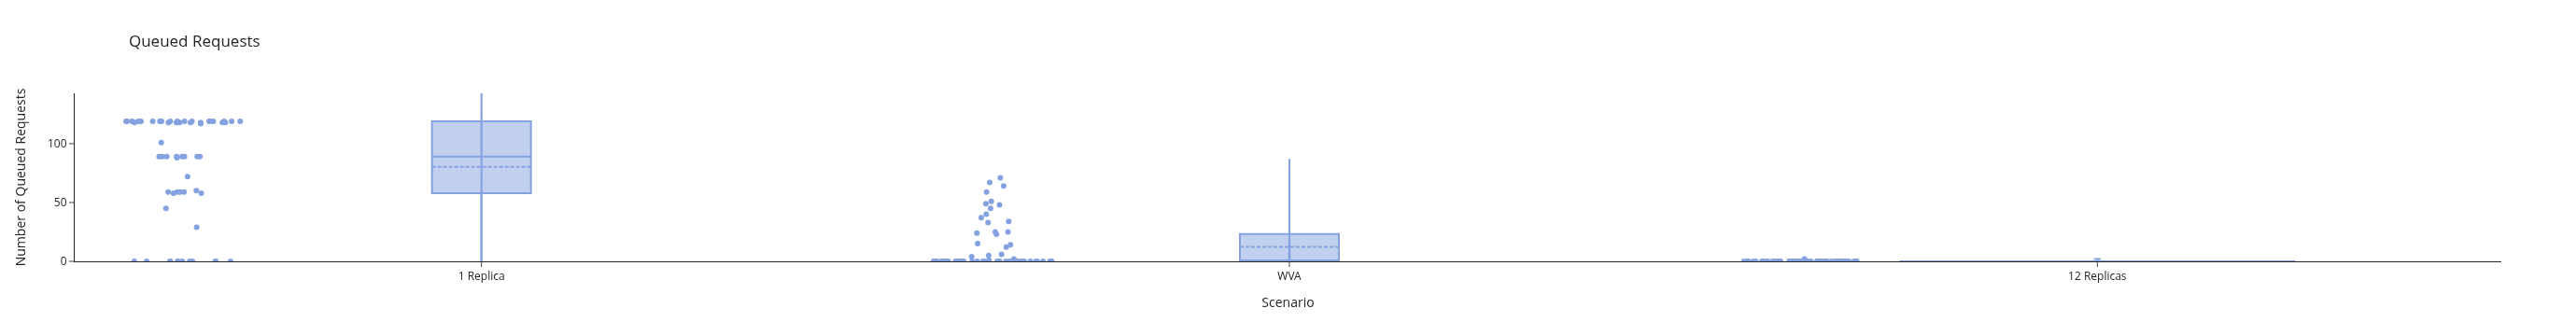

In [5]:
legend_once = True
for k, v in plots.items():
    df, fig = v
    # show legend
    fig.update_layout(legend=dict(yanchor="top", y=-0.5, xanchor="left", x=0.01))
    fig.update_layout(template="simple_white")
    has_violin = any(tr.type == "violin" for tr in fig.data)

    if has_violin:
        ymax = max(
            np.nanmax(tr.y) for tr in fig.data
            if hasattr(tr, "y") and tr.y is not None
        )
        fig.update_yaxes(range=[0, ymax*1.2], autorange=False, rangemode="tozero")
    else:
        fig.update_layout(legend=dict(
            orientation="h",
            x=0.5,
            xanchor="center",
            y=1.02,
            yanchor="bottom",
        ))

    fig.show()
